In [359]:
#Independent Data Science Project Part 2 by Zara Clacken
#Question: How did the Povery Population change for each race between the years 2013-2018?

In [360]:
#Import Packages
import warnings
warnings.filterwarnings('ignore')  
import numpy as np
import pandas as pd 

In [361]:
#Import Raw Data Set

povertyraw = pd.read_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Raw Data/Poverty by Race and Ethnicity.csv') 
povertyraw

,ID Race,Race,ID Year,Year,ID Poverty Status,Poverty Status,Poverty Population,Poverty Population Margin of Error(Moe),Geography,ID Geography,Slug Geography,share
0,1,White,2013,2013,0,Income In The Past 12 Months Below Poverty Level,29701062,97115.895530,United States,01000US,united-states,0.479823
1,1,White,2014,2014,0,Income In The Past 12 Months Below Poverty Level,29193983,92676.176460,United States,01000US,united-states,0.476341
2,1,White,2015,2015,0,Income In The Past 12 Months Below Poverty Level,28027149,95135.243000,United States,01000US,united-states,0.477800
3,1,White,2016,2016,0,Income In The Past 12 Months Below Poverty Level,26653418,92998.998830,United States,01000US,united-states,0.475246
4,1,White,2017,2017,0,Income In The Past 12 Months Below Poverty Level,25668489,89754.419970,United States,01000US,united-states,0.477490
5,1,White,2018,2018,0,Income In The Past 12 Months Below Poverty Level,25230693,90255.224380,United States,01000US,united-states,0.477151
6,9,Hispanic,2013,2013,0,Income In The Past 12 Months Below Poverty Level,13089210,60768.446300,United States,01000US,united-states,0.211457
7,9,Hispanic,2014,2014,0,Income In The Past 12 Months Below Poverty Level,13079584,60525.658200,United States,01000US,united-states,0.213412
8,9,Hispanic,2015,2015,0,Income In The Past 12 Months Below Poverty Level,12505613,63334.284890,United States,01000US,united-states,0.213193
9,9,Hispanic,2016,2016,0,Income In The Past 12 Months Below Poverty Level,11814468,61008.833560,United States,01000US,united-states,0.210659


---

In [362]:
#How many rows? 
len(povertyraw)

48

In [363]:
#Column Names?
povertyraw.columns

Index(['ID Race', 'Race', 'ID Year', 'Year', 'ID Poverty Status',
       'Poverty Status', 'Poverty Population',
       'Poverty Population Margin of Error(Moe)', 'Geography', 'ID Geography',
       'Slug Geography', 'share'],
      dtype='object')

In [364]:
#What are the Races?
povertyraw.Race.unique()

array(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'Two Or More',
       'Native American', 'Pacific Islander'], dtype=object)

In [365]:
#Drop Unnecessary Columns
#Remove Other Race to match the single home chart 

RaceFilter = povertyraw.Race != 'Other'

poverty = povertyraw[RaceFilter].drop(['ID Race','ID Year','ID Poverty Status','Poverty Status','Poverty Population Margin of Error(Moe)', 'Geography', 'ID Geography', 'Slug Geography'], axis = 1)


---

In [366]:
#Columns of Data Frame poverty 
poverty.columns

Index(['Race', 'Year', 'Poverty Population', 'share'], dtype='object')

In [367]:
#Unique Races
poverty.Race.unique()

array(['White', 'Hispanic', 'Black', 'Asian', 'Two Or More',
       'Native American', 'Pacific Islander'], dtype=object)

In [368]:
#Rename the new data frame's columns
poverty.columns = ['Race', 'Year','PovertyPopulation', 'PercentofTotalPovertyPopulation']
poverty

,Race,Year,PovertyPopulation,PercentofTotalPovertyPopulation
0,White,2013,29701062,0.479823
1,White,2014,29193983,0.476341
2,White,2015,28027149,0.477800
3,White,2016,26653418,0.475246
4,White,2017,25668489,0.477490
5,White,2018,25230693,0.477151
6,Hispanic,2013,13089210,0.211457
7,Hispanic,2014,13079584,0.213412
8,Hispanic,2015,12505613,0.213193
9,Hispanic,2016,11814468,0.210659


In [369]:
#What are the data types of each column? 
poverty.info('columns')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Race                             42 non-null     object 
 1   Year                             42 non-null     int64  
 2   PovertyPopulation                42 non-null     int64  
 3   PercentofTotalPovertyPopulation  42 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [370]:
#Change Data Types. Make Race and Year categorical variables.  
poverty.Race = poverty.Race.astype('category')
poverty.Year = poverty.Year.astype('category')
poverty.info('columns')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Race                             42 non-null     category
 1   Year                             42 non-null     category
 2   PovertyPopulation                42 non-null     int64   
 3   PercentofTotalPovertyPopulation  42 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 1.6 KB


---

In [371]:
#Multiply the values in the Percent Column by 100 to make them percentages
poverty.PercentofTotalPovertyPopulation = (poverty.PercentofTotalPovertyPopulation)*100
poverty

,Race,Year,PovertyPopulation,PercentofTotalPovertyPopulation
0,White,2013,29701062,47.982269
1,White,2014,29193983,47.634116
2,White,2015,28027149,47.780046
3,White,2016,26653418,47.524557
4,White,2017,25668489,47.748957
5,White,2018,25230693,47.715132
6,Hispanic,2013,13089210,21.145708
7,Hispanic,2014,13079584,21.341193
8,Hispanic,2015,12505613,21.319284
9,Hispanic,2016,11814468,21.065867


---

In [372]:
#Sum Asian and Pacific Islander Percentages 
yearlist = poverty.Year.unique().tolist()
AAPercent = []
PIPercent = []
for Y in yearlist:
    AAPercent.append(np.array(poverty[poverty.Year == Y][poverty.Race == 'Asian'].PercentofTotalPovertyPopulation))
    PIPercent.append(np.array(poverty[poverty.Year == Y][poverty.Race == 'Pacific Islander'].PercentofTotalPovertyPopulation))
    AAPIPercent = np.add(AAPercent,PIPercent)
AAPIPercent.tolist()

[[3.3994465000000003],
 [3.5266773],
 [3.6463480000000006],
 [3.8001397],
 [3.8760874999999992],
 [3.8945731]]

In [373]:
#Sum Asian and Pacific Islander Populations
AAPop = []
PIPop = []
for Y in yearlist:
    AAPop.append(np.array(poverty[poverty.Year == Y][poverty.Race == 'Asian'].PovertyPopulation))
    PIPop.append(np.array(poverty[poverty.Year == Y][poverty.Race == 'Pacific Islander'].PovertyPopulation))
    AAPIPop = np.add(AAPop,PIPop)
AAPIPop.tolist()

[[2104260], [2161429], [2138900], [2131250], [2083675], [2059363]]

---

In [374]:
#Insert New Rows for Asian and Pacific Islanders combined

In [375]:
#Create an AAPI list to place into dictionary  

a = '"Asian and Pacific Islander"'
def AAPIfunc():
    counter = 0
    while counter < 6:
            print(counter,':', a , ',', end = ' ')
            counter = counter + 1 
AAPIfunc()



0 : "Asian and Pacific Islander" , 1 : "Asian and Pacific Islander" , 2 : "Asian and Pacific Islander" , 3 : "Asian and Pacific Islander" , 4 : "Asian and Pacific Islander" , 5 : "Asian and Pacific Islander" , 

In [376]:
#Create a Population list to enter into a dictionary
poplist = [2104260, 2161429, 2138900, 2131250, 2083675, 2059363]
def popfunc():
    counter = 0
    while counter < 6: 
            for p in poplist:
                    print(counter, ':', p,',', end = ' ')
                    counter = counter +1 
popfunc()

0 : 2104260 , 1 : 2161429 , 2 : 2138900 , 3 : 2131250 , 4 : 2083675 , 5 : 2059363 , 

In [377]:
#Create a dictionary for list AAPI 
AAPIdict = {0 : "Asian and Pacific Islander" , 1 : "Asian and Pacific Islander" , 2 : "Asian and Pacific Islander" ,
            3 : "Asian and Pacific Islander" , 4 : "Asian and Pacific Islander" , 5 : "Asian and Pacific Islander"}

#test the dictionary
AAPIdict[2]

'Asian and Pacific Islander'

In [378]:
#Create a Year list to put into a dictionary

years = poverty.Year.unique().tolist()
def yearfunc():
    counter = 0
    while counter < 6: 
            for y in years:
                    print(counter, ':', y,',', end = ' ')
                    counter = counter +1 
yearfunc()


0 : 2013 , 1 : 2014 , 2 : 2015 , 3 : 2016 , 4 : 2017 , 5 : 2018 , 

In [379]:
#Create a Dictionary for Years
Yeardict = {0 : 2013 , 1 : 2014 , 2 : 2015 , 3 : 2016 , 4 : 2017 , 5 : 2018}
#Test Dictionary 
Yeardict[4]

2017

In [380]:
#Create a Dictionary for Percentages
percentages = AAPIPercent.tolist()
def percentfunc():
    counter = 0
    while counter < 6:
        for p in percentages:
            print(counter, ':', p,',', end = ' ')
            counter = counter + 1
percentfunc()

0 : [3.3994465000000003] , 1 : [3.5266773] , 2 : [3.6463480000000006] , 3 : [3.8001397] , 4 : [3.8760874999999992] , 5 : [3.8945731] , 

In [381]:
Percentdict = {0 : [3.3994465000000003] , 1 : [3.5266773] , 2 : [3.6463480000000006] , 
               3 : [3.8001397] , 4 : [3.8760874999999992] , 5 : [3.8945731]}
Percentdict[0]

[3.3994465000000003]

In [382]:
#Define function to insert new rows into data frame
numberlist = [0,1,2,3,4,5]
AAPIdict = {0 : "Asian and Pacific Islander" , 1 : "Asian and Pacific Islander" , 2 : "Asian and Pacific Islander" ,
            3 : "Asian and Pacific Islander" , 4 : "Asian and Pacific Islander" , 5 : "Asian and Pacific Islander"}
Yeardict = {0 : 2013 , 1 : 2014 , 2 : 2015 , 3 : 2016 , 4 : 2017 , 5 : 2018}
Populationdict = {0 : 2104260 , 1 : 2161429 , 2 : 2138900 , 3 : 2131250 , 4 : 2083675 , 5 : 2059363 }
Percentdict = {0 : 3.3994465000000003 , 1 : 3.5266773 , 2 : 3.6463480000000006 , 
               3 : 3.8001397 , 4 : 3.8760874999999992 , 5 : 3.8945731}

for n in numberlist:
    new_row = {'Race':AAPIdict[n], 'Year':Yeardict[n], 'PovertyPopulation':Populationdict[n],'PercentofTotalPovertyPopulation':Percentdict[n]}
    poverty = poverty.append(new_row, ignore_index=True)

In [383]:
#Drop original Asian rows`

index_Asian = poverty[poverty.Race == 'Asian'].index
poverty.drop(index_Asian, inplace = True)
poverty.Race.unique()

array(['White', 'Hispanic', 'Black', 'Two Or More', 'Native American',
       'Pacific Islander', 'Asian and Pacific Islander'], dtype=object)

In [384]:
#Drop original Pacific Islander Rows
index_Pacific = poverty[poverty.Race == 'Pacific Islander'].index
poverty.drop(index_Pacific, inplace = True)
poverty.Race.unique()

array(['White', 'Hispanic', 'Black', 'Two Or More', 'Native American',
       'Asian and Pacific Islander'], dtype=object)

In [385]:
#Round Percent Decimal Points
poverty.PercentofTotalPovertyPopulation = np.round(poverty.PercentofTotalPovertyPopulation,2)

In [386]:
#Final Data Frame
poverty

,Race,Year,PovertyPopulation,PercentofTotalPovertyPopulation
0,White,2013,29701062,47.98
1,White,2014,29193983,47.63
2,White,2015,28027149,47.78
3,White,2016,26653418,47.52
4,White,2017,25668489,47.75
5,White,2018,25230693,47.72
6,Hispanic,2013,13089210,21.15
7,Hispanic,2014,13079584,21.34
8,Hispanic,2015,12505613,21.32
9,Hispanic,2016,11814468,21.07


---

In [387]:
#Create Visualization

In [388]:
#Import Seaborn
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [389]:
#What are the unique races? 
poverty.Race.unique()

array(['White', 'Hispanic', 'Black', 'Two Or More', 'Native American',
       'Asian and Pacific Islander'], dtype=object)

In [390]:
#Replace Two or More with Multiracial
poverty.Race = poverty.Race.replace('Two Or More','Multiracial')

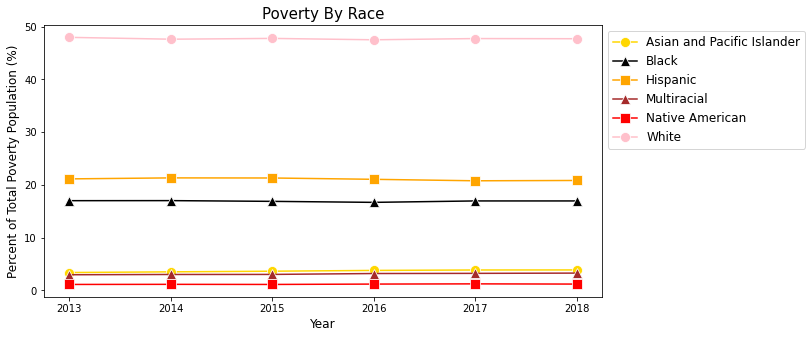

In [391]:
#Create Line Plot

#Create List and Dictionaries

racelist = sorted(['White', 'Hispanic', 'Black', 'Multiracial','Native American', 'Asian and Pacific Islander'])
LineColor = {'Native American':'Red', 'Asian and Pacific Islander': 'Gold', 'Black':'Black',
             'Hispanic':'Orange', 'White': 'Pink', 'Multiracial': 'Brown'}
LineMarker = {'Native American':'s', 'Asian and Pacific Islander': 'o', 'Black':'^',
             'Hispanic':'s', 'White': 'o', 'Multiracial': '^'}

#Create Plot Function
def povertyplot(racelist):
    for race in racelist:
        sns.lineplot(data = poverty[poverty.Race == race], x = 'Year', y = 'PercentofTotalPovertyPopulation', label = race,\
                     c= LineColor[race], marker = LineMarker[race], markersize = 10 )
    plt.legend(loc ='upper left', bbox_to_anchor = (1,1), prop = {'size': 12})
    plt.title("Poverty By Race", fontsize = 15)
    plt.ylabel('Percent of Total Poverty Population (%)', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)
    plt.show

plt.rcParams['figure.figsize'] = (10,5)
    
povertyplot(racelist)

---

In [392]:
poverty.columns

Index(['Race', 'Year', 'PovertyPopulation', 'PercentofTotalPovertyPopulation'], dtype='object')

In [393]:
#Change Column Names Again For Export to be joined with other dataframes in SQL
poverty.columns = ['Race', 'Year','Poverty Population', 'Percent of Total Poverty Population']
poverty

,Race,Year,Poverty Population,Percent of Total Poverty Population
0,White,2013,29701062,47.98
1,White,2014,29193983,47.63
2,White,2015,28027149,47.78
3,White,2016,26653418,47.52
4,White,2017,25668489,47.75
5,White,2018,25230693,47.72
6,Hispanic,2013,13089210,21.15
7,Hispanic,2014,13079584,21.34
8,Hispanic,2015,12505613,21.32
9,Hispanic,2016,11814468,21.07


In [394]:
#Export New Data Frame as CSV 
#poverty.to_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Created CSV Files/2013-2018_Poverty_By_Race.csv')